# Example using PolynomialFeature and LinearRegression

## (using validadtion_curve, learning_curve and GridSearchCV)

In [48]:


#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


Para o exemplo irá utilizar-se um função polinomial para a geração dos dados e a aplicação dos recursos do sklearn. Irá utilizar-se a função polinomial como apresentada abaixo:

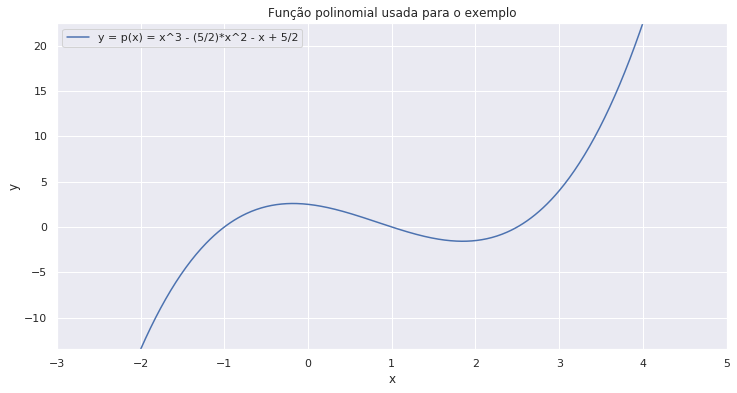

In [2]:

# definindo a função polinômial
def func_polynomial(x):
    y = x**3 - (5/2)*x**2 - x + (5/2) # equivalente a função polinomial y = p(x) = x^3 - (5/2)*x^2 - x + 5/2
    return y


# plotagem da função polinômial acima dentro de um intervalo
def func_polynomial_plot(interval=[-2,4]):
    x = np.linspace(interval[0],interval[1],500)
    y = func_polynomial(x)
    fig, axe = plt.subplots(figsize=(12,6))
    plt.plot(x, y,label="y = p(x) = x^3 - (5/2)*x^2 - x + 5/2")
    plt.xlim(interval[0]-1, interval[1]+1)
    plt.ylim(func_polynomial(interval[0]), func_polynomial(interval[1]))
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Função polinomial usada para o exemplo')
    plt.show()
    
func_polynomial_plot()
    

Abaixo é criada uma função que cria os dados, para o exemplo, tomando como base a função polinomial acima.

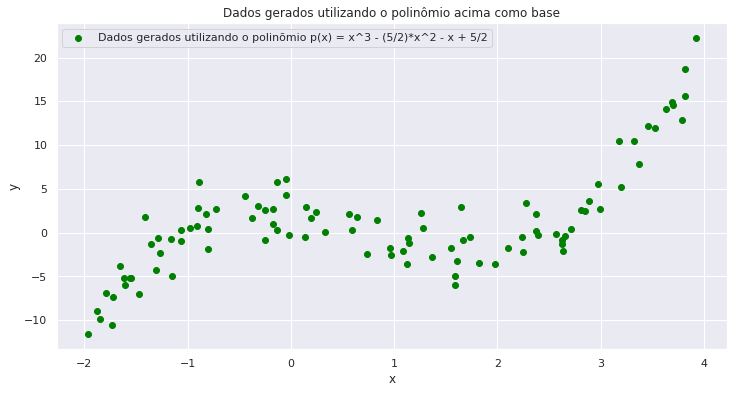

In [3]:

#gerando os dados para o exemplo
def make_data(interval=[-2,4],size=100, seed=42, espalhamento=2.3):
    rns = np.random.RandomState(seed)
    x = (abs(interval[1])+abs(interval[0]))*rns.rand(size) - abs(interval[0]) #gerando valores aleatórios dentro do intervalo dado
    y = func_polynomial(x)
    if( espalhamento > 0):
        y += rns.randn(size)*espalhamento
    return x, y

#plotagem dos dados acima, repare que o formato é o mesmo do polinômio usado como base, acima plotado
def plot_data(x,y):
    fig, axe = plt.subplots(figsize=(12,6))
    plt.scatter(x, y, label="Dados gerados utilizando o polinõmio p(x) = x^3 - (5/2)*x^2 - x + 5/2", color='green')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Dados gerados utilizando o polinômio acima como base")
    plt.legend()
    plt.show()
    
x, y = make_data()
plot_data(x,y)


In [4]:
df_x = pd.DataFrame(x, columns=['x0']); df_x

,x0
0,0.247241
1,3.704286
2,2.391964
3,1.591951
4,-1.063888
...,...
95,0.962774
96,1.136397
97,0.565246
98,-1.847485


Abaixo é realizado um exemplo utilizando PolynomialFeatures e RegressãoLinear com o parâmetro degree = 3 em PolynomialFeatures.

In [5]:

#Aplicando Polynomial Features

model_polyn = PolynomialFeatures(degree=3) #Instanciando PolynomialFeatures com degree = 3

x_poly_features = model_polyn.fit_transform(x[:,np.newaxis]) #Aplicando PolynomialFeatures sobre os dados x
df_x_poly_feat = pd.DataFrame(x_poly_features, columns=model_polyn.get_feature_names()) #criando um DataFrame de x após a aplicação de PolynomialFeatures

df_x_poly_feat


,1,x0,x0^2,x0^3
0,1.0,0.247241,0.061128,0.015113
1,1.0,3.704286,13.721734,50.829223
2,1.0,2.391964,5.721490,13.685596
3,1.0,1.591951,2.534308,4.034493
4,1.0,-1.063888,1.131858,-1.204170
...,...,...,...,...
95,1.0,0.962774,0.926933,0.892427
96,1.0,1.136397,1.291398,1.467541
97,1.0,0.565246,0.319503,0.180598
98,1.0,-1.847485,3.413202,-6.305840


In [6]:

# Aplicando LinearRegression

model_linearReg = LinearRegression() #Instanciando LinearRegression

modelL = model_linearReg.fit(x_poly_features,y) #Aplicando LinearRegression sobre x_poly_features

In [7]:

# Nesse ponto utilizanmos o modelo LinearRegression criado acima, utilizando x_poly_features 

x_n = np.linspace(-2,4,500) #Novos dados para a aplicação do modelo

x_n_poly_features = model_polyn.fit_transform(x_n[:,np.newaxis]) #Aplicando PolynomialFeatures sobre os novos dados

y_n_predict_model = model_linearReg.predict(x_n_poly_features) #Aplicando o modelo sobre os novos dados modificados por PolynomialFeatures para obter os dados preditos



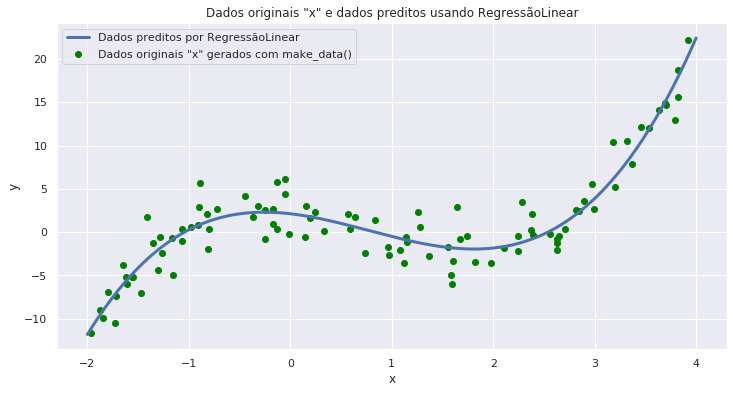

In [8]:

# Plotagem dos dados originais "x" com os valores preditos pelo modelo acima sobre novos dados


def plot_data_2():
    fig, axes = plt.subplots(figsize=(12,6))
    axes.scatter(x, y, color='green', label="Dados originais \"x\" gerados com make_data()")
    axes.plot(x_n, y_n_predict_model, lw=3, label="Dados preditos por RegressãoLinear")
    plt.legend()
    plt.title("Dados originais \"x\" e dados preditos usando RegressãoLinear")
    plt.xlabel('x'); plt.ylabel('y')
    plt.show()
    

plot_data_2()


Observe acima que os dados preditos pelo modelo segue o que esperavámos (apresenta o mesmo compartamento que o polinômio utilizado como base para gerar os dados), desse modo a modelo utilizado consegue gerar uma curva que representa bem o padrão dos nossos dados. Para obtermos os coeficientes da curva predita pelo nosso modelo podemos utilizar:

In [9]:
poly_coeficientes = modelL.coef_
poly_intercept = modelL.intercept_

print('Coeficientes: ', poly_coeficientes)
print('Intercept: ', poly_intercept)

Coeficientes:  [ 0.         -1.34838763 -2.2374964   0.96083181]
Intercept:  2.12912258467624


O ponto chave agora é investigarmos se nosso modelo pode ser melhorado modificando, por exemplo, parâmetros ou adicionando novos dados para treino. Comecemos por análisar então quais parâmetros poderiámos alterar, acrescentar (como por exemplo, outros valores para o parâmetro "degree" em PolynomailFeatures) ao nosso modelo.

## Validation curve

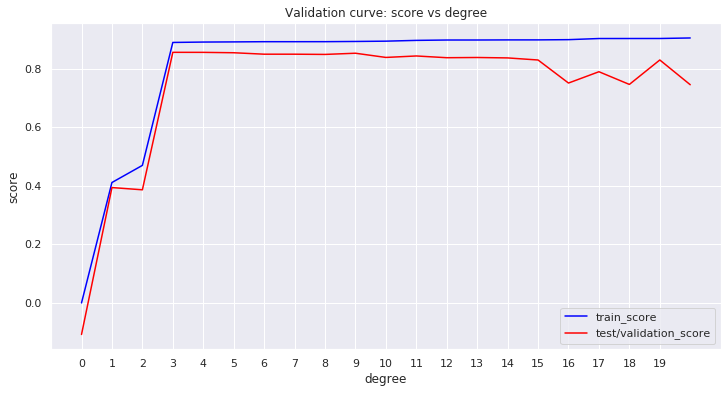

In [10]:

model = make_pipeline(PolynomialFeatures(), LinearRegression())
#definindo um pipeline, ou seja, aplicando, nesse exemplo, primeiramente PolynomialFeatures e depois LinearRegression sobre o conjunto de dados de entrada

range_degree = np.arange(0,21) # definindo o intervalo em que iremos avaliar o parâmetro degree de PolynomialFeatures

train_score, test_score = validation_curve(model, x[:, np.newaxis], y, param_name="polynomialfeatures__degree", param_range=range_degree, cv=7)
#obtendo os scores (train e test) para deferentes valores do parâmetro degree em polynomialfeatures

# train_score conterão dimensões de (21, 7), devido a "range_degree" e "cv"
train_score = np.median(train_score,1) #pegando a mediana de cada linha de train_score, observe que antes disso train_score possuía dimensões (21,7) e depois com essa linha passa a ter dimensão (21,)
test_score = np.median(test_score, 1) # pegando a mediana de cada linha de test_score


def plot_validation_curve(param, param_name, score={'train','test'}):
    fig, axe = plt.subplots(figsize=(12,6))
    plt.plot(param, score['train'], color='blue', label='train_score')
    plt.plot(param, score['test'], color='red', label='test/validation_score')
    plt.legend()
    plt.xlabel(param_name)
    plt.ylabel('score')
    plt.title('Validation curve: score vs '+param_name)
    plt.xticks(np.arange(min(param), max(param)))
    plt.show()
    
plot_validation_curve(range_degree, 'degree', score={'train':train_score, 'test':test_score})


Observe que o <b>degree</b> que apresenta melhor score (melhor troca entre bies e variancia) é o <b>degree = 3</b>. Abaixo plotamos a <b>learning_curve</b> para alguns valores do parâmetro <b>degree</b> e para diferentes valores para o tamanho dos dados de treino.

## Learning Curve

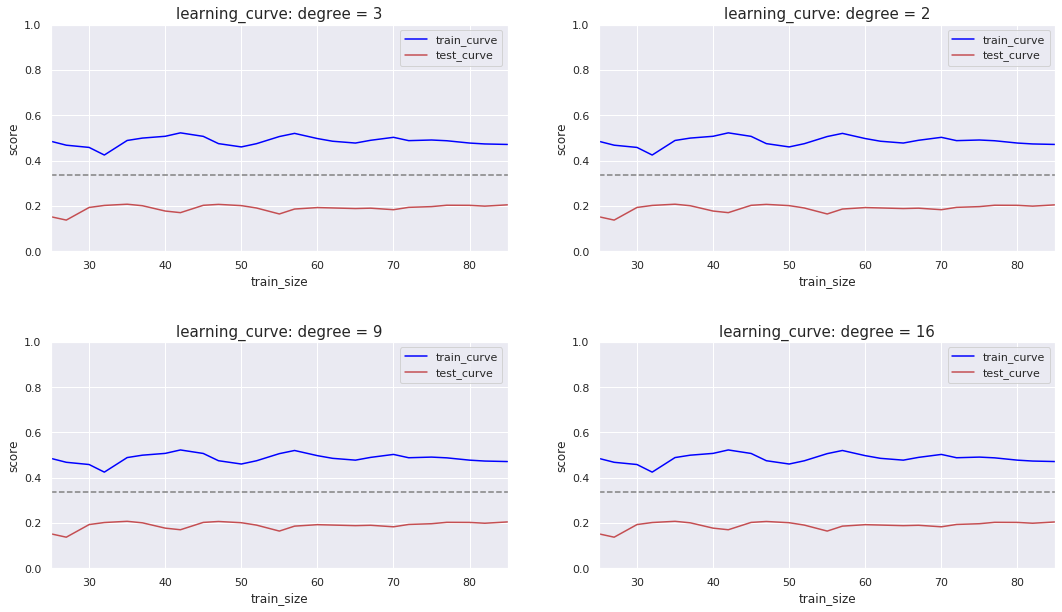

In [46]:

some_values_degree = [3,2,9,16]
size_train = np.linspace(0.3,1,25) 

fig, axe = plt.subplots(2,2, figsize=(18,10))
fig.subplots_adjust(hspace=0.4)

for ax, degree in zip(axe.flat, some_values_degree):
    train_size, train_learn_curve, test_learn_curve = learning_curve(model, x[:,np.newaxis],y,
                                                                    train_sizes=size_train, cv=7)
    
    median_train_learn_curve = np.mean(train_learn_curve, 1) #mediana das linhas em train_learn_curve
    median_test_learn_curve = np.mean(test_learn_curve, 1) #mediana das linhas em test_learn_curve
    
    ax.plot(train_size, median_train_learn_curve, color='blue', label="train_curve")
    ax.plot(train_size, median_test_learn_curve, color='r', label="test_curve")
    ax.hlines(np.mean([train_learn_curve[-1], test_learn_curve[-1]]), train_size[0], train_size[-1], linestyle="dashed", color="gray")
    #Observe que o segundo e terceiro argumento fornecem o intevalo a ser plotado a linha horizontal
    #Observe que o primeiro argumento fornece o valor da media entre as duas curvas representado pela linha horizontal
    
    ax.set_title("learning_curve: degree = {0}".format(degree), size=15)
    ax.set_xlabel("train_size")
    ax.set_ylabel("score")
    ax.set_ylim(0,1) #limite para o score
    ax.set_xlim(train_size[0], train_size[-1]) #primeiro e último valores para o tamanho dos dados de treino
    ax.legend()
    
plt.show()


Através da curva de aprendizado podemos perceber, para esse exemplo, que a partir de determinado tamanho dos dados de trenho, 0.7, o acrescimo de mais dados não parece interferir no score de nosso modelo, sendo então necessário utilizar outro modelo ou diferentes valores de hyperparametros para a obtenção de um melhor score.<br>

## GridSearchCV

In [52]:

#combinações de parametros que desejamos realizar os testes para obter-se o melhor score
grid_params = {'polynomialfeatures__degree':np.arange(21),
              'linearregression__fit_intercept':[True, False],
              'linearregression__normalize':[True, False]}

grid = GridSearchCV(model, grid_params, cv=7) # Instanciando GridSearchCV

grid.fit(x[:,np.newaxis],y); #aplicando grid aos dados


In [53]:
grid.best_params_ #Melhor combinação de hyperparâmetros para a construção do modelo

{'linearregression__fit_intercept': True,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

In [54]:
grid.best_score_

0.8307738766011622

Agora podemos aplicar as adequações dada acima ao nosso modelo.

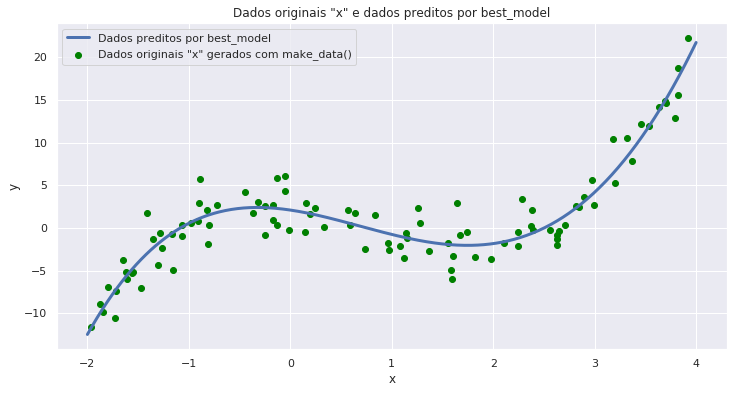

In [64]:

best_model = grid.best_estimator_

y_best_model = best_model.fit(x[:, np.newaxis], y).predict(x_n[:,np.newaxis])

fig, axe = plt.subplots(figsize=(12,6))
plt.scatter(x,y, color='green', label="Dados originais \"x\" gerados com make_data()")
plt.plot(x_n, y_best_model, lw=3,label="Dados preditos por best_model")
plt.title("Dados originais \"x\" e dados preditos por best_model", size=15)
plt.xlabel('x'); plt.ylabel('y')
plt.legend()
plt.show()


In [72]:
print("Parâmetros: \n", best_model.get_params)

Parâmetros: 
 <bound method Pipeline.get_params of Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=4, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=True))],
         verbose=False)>


In [74]:
print("Passos: \n",best_model.named_steps)

Passos: 
 {'polynomialfeatures': PolynomialFeatures(degree=4, include_bias=True, interaction_only=False,
                   order='C'), 'linearregression': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)}


In [77]:
print("Coeficientes: ", best_model.named_steps['linearregression'].coef_)
print("Intercept: ", best_model.named_steps['linearregression'].intercept_)

Coeficientes:  [ 0.         -1.75788307 -2.16555704  1.10442986 -0.03664936]
Intercept:  2.092076402333147


Em [2] pode ser encontrado mais detalhes sobre esses exemplos.

## Referências

[1] https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_bias_variance.html 
<br>
[2] https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html
<br>
[3] https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html